In [ ]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
%matplotlib inline
import seaborn as sns
import matplotlib
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
cirebon = pd.read_csv('/content/lgdcirebon.csv')
pameungpeuk = pd.read_csv('/content/lgdpameungpeuk.csv')

#AMOUNT

In [ ]:
trans_crb = cirebon[['SO Date', 'pelanggan', 'SO AMOUNT', 'DO AMOUNT']]
trans_pmp = pameungpeuk[['SO Date', 'pelanggan', 'SO AMOUNT', 'DO AMOUNT']]

In [ ]:
trans_crb.head()

,SO Date,pelanggan,SO AMOUNT,DO AMOUNT
0,2022-01-31,seblak Rahma Raehan,12665.45,12665.45
1,2022-01-31,hani maryati / Mulyono,50662.73,50662.73
2,2022-01-31,Lina Lili,12665.45,12665.45
3,2022-01-31,Lina Lili,12665.45,12665.45
4,2022-01-31,Mang Sapardi,11820.00,11820.00


In [ ]:
trans_pmp.head()

,SO Date,pelanggan,SO AMOUNT,DO AMOUNT,groupmonth
0,2021-08-20,billy graham,75020.91,75020.91,2021-08
1,2021-08-21,Aswin prasetyo Prasetyo,156331.80,156331.80,2021-08
2,2021-08-24,Aswin prasetyo Prasetyo,208442.70,208442.70,2021-08
3,2021-08-24,Aswin prasetyo Prasetyo,19572.73,19572.73,2021-08
4,2021-08-24,delosa sibejo,471558.20,471558.20,2021-08


In [ ]:
#crb_monthly=trans_crb.groupby(['pelanggan']).sum().reset_index()

In [ ]:
crb_monthly=trans_crb.groupby(['pelanggan']).sum()

In [ ]:
len(crb_monthly)

267

In [ ]:
trans_pmp2 = trans_pmp.groupby(['pelanggan','groupmonth']).sum()

In [ ]:
#pmp_monthly=trans_pmp2.groupby(['pelanggan']).mean().reset_index()

In [ ]:
pmp_monthly=trans_pmp2.groupby(['pelanggan']).mean()

In [ ]:
append_monthly = crb_monthly.append(pmp_monthly)

In [ ]:
append_monthly.shape

(424, 2)

In [ ]:
testkmeans = append_monthly['SO AMOUNT'].to_numpy().reshape(-1,1)

In [ ]:
append_monthly.shape

(424, 2)

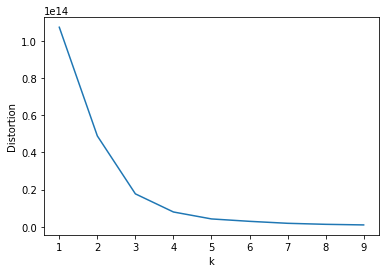

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(testkmeans)
    distortions.append(kmeanModel.inertia_)
plt.figure()
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeansamt = KMeans(n_clusters=3, random_state=0).fit_predict(testkmeans)

In [ ]:
kmeansamt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [ ]:
#???
append_monthly['Groupdist'] = kmeansamt

In [ ]:
print(append_monthly.loc[append_monthly['Groupdist'] == 2]['SO AMOUNT'].min())
print(append_monthly.loc[append_monthly['Groupdist'] == 2]['SO AMOUNT'].max())
print(append_monthly.loc[append_monthly['Groupdist'] == 1]['SO AMOUNT'].min())
print(append_monthly.loc[append_monthly['Groupdist'] == 1]['SO AMOUNT'].max())
print(append_monthly.loc[append_monthly['Groupdist'] == 0]['SO AMOUNT'].min())
print(append_monthly.loc[append_monthly['Groupdist'] == 0]['SO AMOUNT'].max())


769471.815
2662064.1
7154386.31
7154386.31
3713.64
708300.9


In [ ]:
append_monthly['Groupdist2'] = str(kmeansamt)
append_monthly.sort_values(by=['SO AMOUNT'])
for i in range(len(append_monthly)):
  if(append_monthly['Groupdist'][i]==0):
    append_monthly['Groupdist2'][i] = "<710000"
  elif(append_monthly['Groupdist'][i]==2):
    append_monthly['Groupdist2'][i] = "710000-3000000"
  else:
    append_monthly['Groupdist2'][i] = ">3000000"
append_monthly

,SO AMOUNT,DO AMOUNT,Groupdist,Groupdist2
pelanggan,,,,
4nt0 Crb,4.728000e+04,4.728000e+04,0,<710000
A Heru,5.885545e+04,5.885545e+04,0,<710000
A Juha,9.318180e+03,0.000000e+00,0,<710000
A Maman,1.875636e+04,1.875636e+04,0,<710000
Abdul Azis,4.604909e+04,0.000000e+00,0,<710000
Adelisa Adelisa,4.370936e+05,4.370936e+05,0,<710000
Adinda Lady,9.456000e+04,9.456000e+04,0,<710000
Afifa Fitia,2.175164e+05,2.175164e+05,0,<710000
Afifah Suci,3.339364e+04,3.339364e+04,0,<710000


0    391
1      1
2     32
Name: Groupdist, dtype: int64


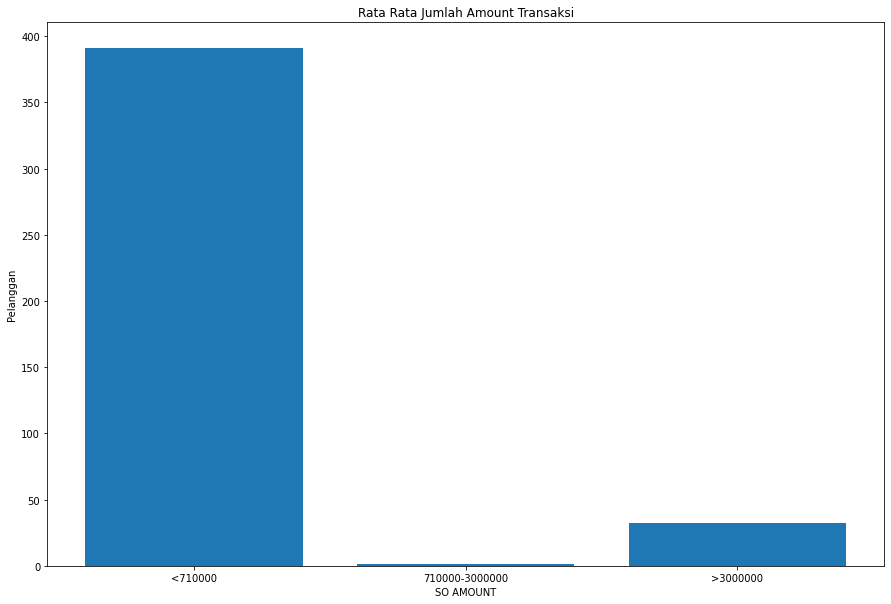

In [ ]:
#Kayanya kebalik antara 1 dan 2
print(append_monthly['Groupdist'].value_counts().sort_index())
plt_2 = plt.figure(figsize=(15, 10))
plt.bar(append_monthly['Groupdist2'].value_counts().index,append_monthly['Groupdist'].value_counts().sort_index(), width=0.8)
plt.title('Rata Rata Jumlah Amount Transaksi')
plt.xlabel('SO AMOUNT')
plt.ylabel('Pelanggan')
plt.show()

In [ ]:
append_monthly['Groupdist2'].value_counts()/append_monthly['Groupdist2'].count()*100

<710000           92.216981
710000-3000000     7.547170
>3000000           0.235849
Name: Groupdist2, dtype: float64

# FREKUENSI

In [ ]:
import numpy as np
import datetime
trans_pmp['groupmonth'] = np.nan
for i in range(len(trans_pmp)):
  x = datetime.datetime(int(trans_pmp["SO Date"].iloc[i][0:4]),int(trans_pmp["SO Date"].iloc[i][5:7]), int(trans_pmp["SO Date"].iloc[i][8:10]))
  if(x.month<10):
    trans_pmp['groupmonth'].iloc[i] = str(x.year)+'-0'+str(x.month)
  else:
    trans_pmp['groupmonth'].iloc[i] = str(x.year)+'-'+str(x.month)

In [ ]:
import numpy as np
import datetime
trans_crb['groupmonth'] = np.nan
for i in range(len(trans_crb)):
  x = datetime.datetime(int(trans_crb["SO Date"].iloc[i][0:4]),int(trans_crb["SO Date"].iloc[i][5:7]), int(trans_crb["SO Date"].iloc[i][8:10]))
  if(x.month<10):
    trans_crb['groupmonth'].iloc[i] = str(x.year)+'-0'+str(x.month)
  else:
    trans_crb['groupmonth'].iloc[i] = str(x.year)+'-'+str(x.month)

In [ ]:
frek_pmp = trans_pmp.groupby(['groupmonth','pelanggan'],as_index=False).agg({'SO AMOUNT': 'sum'})

In [ ]:
frek_crb = trans_crb.groupby(['groupmonth','pelanggan'],as_index=False).agg({'SO AMOUNT': 'sum'})

In [ ]:
append_frek = frek_crb.append(frek_pmp)

In [ ]:
dffrek = append_frek.groupby(['pelanggan'])['pelanggan'].count()
print(dfpmp)

pelanggan
AI KURNIAWATI                1
Aan Sopian                   1
Aas Nur                      1
Adam Suherman                2
Adi Sitanggang               1
Agus Darju Juandi            2
Ahmoed Ray                   1
Akmal Hasibuan               1
Alexandra malango Malango    1
Alfini Aisyah                1
Alimin Kholib                1
Amelia Susanti               1
Aminda gloria                1
Andi Nadeak                  2
Anggi Miftahurrohman         1
Ani Sarmini                  1
Ano Riano                    1
Asep Komarudin               1
Aswin prasetyo Prasetyo      3
Ayang Beby                   2
Baron Mas gor                1
Biyya Siti                   1
Bolankz andriana             1
Buat Akun                    1
Cecep Ilham buyung           2
Cepi Januar                  2
Chadydu Dubae                2
Cucu Susmiati                1
Denny Himawan                1
Didin Saefuloh               1
Dina siboro                  2
Dolly Ys                     

In [ ]:
testkmeansp = []
for i in range(len(append_frek.groupby(['pelanggan'])['pelanggan'].count())):#.groupby(['pelanggan']).count())):
  testkmeansp.append([append_frek.groupby(['pelanggan'])['pelanggan'].count()[i]])#.groupby(['pelanggan']).count()[i]])

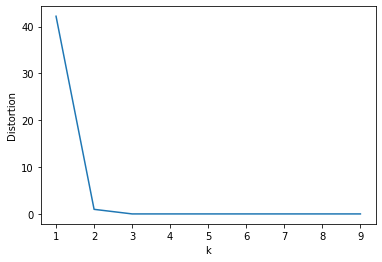

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(testkmeansp) ##tabel nya testkmeans >> bisa diganti jadi df[""DO_amount"]
    distortions.append(kmeanModel.inertia_)
plt.figure()
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeansp = KMeans(n_clusters=2, random_state=0).fit_predict(testkmeansp)

In [ ]:
kmeansp

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
dfkmeansp = append_frek.groupby(['pelanggan'])['pelanggan'].count().to_frame()#.groupby(['pelanggan']).mean().to_frame()
dfkmeansp['Groupdist'] = kmeansp

In [ ]:
dfkmeansp.columns = ['Count', 'Groupdist']

In [ ]:
print(dfkmeansp.loc[dfkmeansp['Groupdist'] == 1]['Count'].min())
print(dfkmeansp.loc[dfkmeansp['Groupdist'] == 1]['Count'].max())
print(dfkmeansp.loc[dfkmeansp['Groupdist'] == 0]['Count'].min())
print(dfkmeansp.loc[dfkmeansp['Groupdist'] == 0]['Count'].max())

2
3
1
1


In [ ]:
dfkmeansp['Groupdist2'] = str(kmeansp)
dfkmeansp.sort_values(by=['Count'])
for i in range(len(dfkmeansp)):
  if(dfkmeansp['Groupdist'][i]==0):
    dfkmeansp['Groupdist2'][i] = "1"
  else:
    dfkmeansp['Groupdist2'][i] = ">1"
dfkmeansp

,Count,Groupdist,Groupdist2
pelanggan,,,
4nt0 Crb,1,0,1
A Heru,1,0,1
A Juha,1,0,1
A Maman,1,0,1
AI KURNIAWATI,1,0,1
Aan Sopian,1,0,1
Aas Nur,1,0,1
Abdul Azis,1,0,1
Adam Suherman,2,1,>1


0    379
1     44
Name: Groupdist, dtype: int64


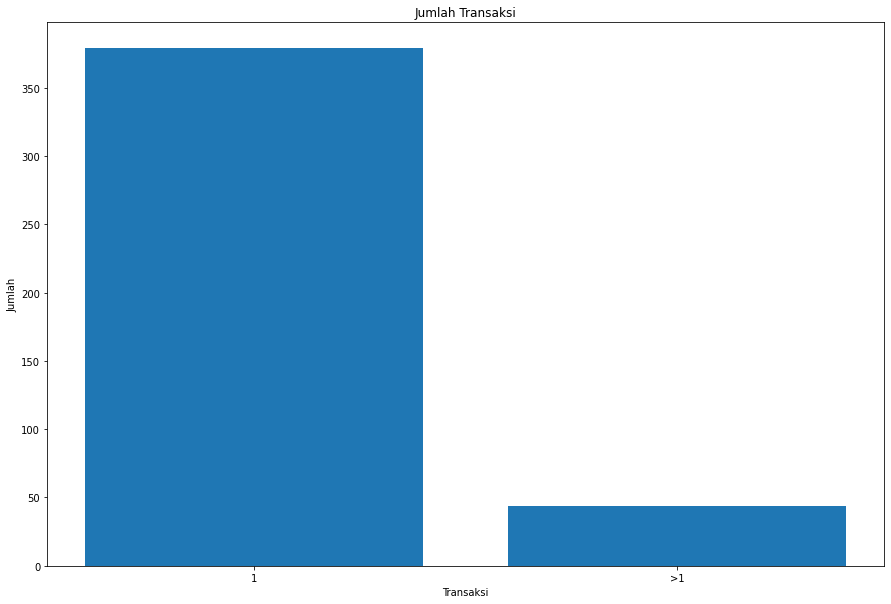

In [ ]:
print(dfkmeansp['Groupdist'].value_counts().sort_index())
plt_2 = plt.figure(figsize=(15, 10))
plt.bar(dfkmeansp['Groupdist2'].value_counts().index,dfkmeansp['Groupdist'].value_counts().sort_index(), width=0.8)
plt.title('Jumlah Transaksi')
plt.xlabel('Transaksi')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
dfkmeansp['Groupdist2'].value_counts()/dfkmeansp['Groupdist2'].count()*100

1     89.598109
>1    10.401891
Name: Groupdist2, dtype: float64

# New Section

In [ ]:
append_monthly['Freq'] = dfkmeansp['Count']
append_monthly['Final'] = ""
append_monthly
for i in range(len(append_monthly)):
  if(append_monthly['Freq'][i]==1):
    append_monthly['Final'][i] = "Jarang Transaksi |"
  else:
    append_monthly['Final'][i] = "Sering Transaksi |"
  if(append_monthly['Groupdist'][i]==0):
    append_monthly['Final'][i] += "Nominal Kecil"
  elif(append_monthly['Groupdist'][i]==2):
    append_monthly['Final'][i] += "Nominal Sedang"
  else:
    append_monthly['Final'][i] += "Nominal Besar"
append_monthly

,SO AMOUNT,DO AMOUNT,Groupdist,Groupdist2,Freq,Final
pelanggan,,,,,,
4nt0 Crb,4.728000e+04,4.728000e+04,0,<710000,1,Jarang Transaksi |Nominal Kecil
A Heru,5.885545e+04,5.885545e+04,0,<710000,1,Jarang Transaksi |Nominal Kecil
A Juha,9.318180e+03,0.000000e+00,0,<710000,1,Jarang Transaksi |Nominal Kecil
A Maman,1.875636e+04,1.875636e+04,0,<710000,1,Jarang Transaksi |Nominal Kecil
Abdul Azis,4.604909e+04,0.000000e+00,0,<710000,1,Jarang Transaksi |Nominal Kecil
Adelisa Adelisa,4.370936e+05,4.370936e+05,0,<710000,1,Jarang Transaksi |Nominal Kecil
Adinda Lady,9.456000e+04,9.456000e+04,0,<710000,1,Jarang Transaksi |Nominal Kecil
Afifa Fitia,2.175164e+05,2.175164e+05,0,<710000,1,Jarang Transaksi |Nominal Kecil
Afifah Suci,3.339364e+04,3.339364e+04,0,<710000,1,Jarang Transaksi |Nominal Kecil


In [ ]:
append_monthly['Final'].value_counts()/append_monthly['Final'].count()*100

Jarang Transaksi |Nominal Kecil     85.141509
Sering Transaksi |Nominal Kecil      7.075472
Jarang Transaksi |Nominal Sedang     4.009434
Sering Transaksi |Nominal Sedang     3.537736
Jarang Transaksi |Nominal Besar      0.235849
Name: Final, dtype: float64

# Gap

In [ ]:
trans_pmp['gap'] = trans_pmp['SO AMOUNT'] - trans_pmp['DO AMOUNT']

In [ ]:
trans_crb['gap'] = trans_crb['SO AMOUNT'] - trans_crb['DO AMOUNT']

In [ ]:
gap_pmp= trans_pmp.groupby(['groupmonth','pelanggan'],as_index=False).agg({'gap': 'sum'})

In [ ]:
gap_crb= trans_crb.groupby(['groupmonth','pelanggan'],as_index=False).agg({'gap': 'sum'})

In [ ]:
append_gap = gap_crb.append(gap_pmp)

In [ ]:
testkmeans = []
for i in range(len(append_gap.groupby(['pelanggan']).mean()['gap'])):#.groupby(['pelanggan']).mean())):
  testkmeans.append([append_gap.groupby(['pelanggan']).mean()['gap'][i]])#.groupby(['pelanggan']).mean()[i]])action_date['SO Date'].count()

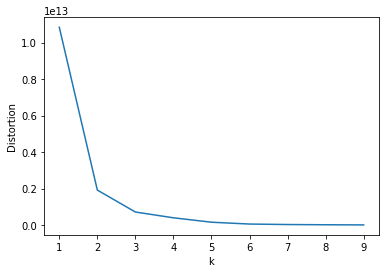

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(testkmeans) ##tabel nya testkmeans >> bisa diganti jadi df[""DO_amount"]
    distortions.append(kmeanModel.inertia_)
plt.figure()
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeansgap = KMeans(n_clusters=2, random_state=0).fit_predict(testkmeans)

In [ ]:
dfkmeansgap = append_gap.groupby(['pelanggan']).mean()['gap'].to_frame()#.groupby(['pelanggan']).mean().to_frame()
dfkmeansgap['Groupdist'] = kmeansgap

In [ ]:
print(dfkmeansgap.loc[dfkmeansgap['Groupdist'] == 1]['gap'].min())
print(dfkmeansgap.loc[dfkmeansgap['Groupdist'] == 1]['gap'].max())
print(dfkmeansgap.loc[dfkmeansgap['Groupdist'] == 0]['gap'].min())
print(dfkmeansgap.loc[dfkmeansgap['Groupdist'] == 0]['gap'].max())

1346431.9545
1957025.0
0.0
785113.5


In [ ]:
dfkmeansgap['Groupdist2'] = str(kmeansgap)
dfkmeansgap.sort_values(by=['gap'])
for i in range(len(dfkmeansgap)):
  if(dfkmeansgap['Groupdist'][i]==0):
    dfkmeansgap['Groupdist2'][i] = "<=1000000"
  else:
    dfkmeansgap['Groupdist2'][i] = ">1000000"
dfkmeansgap

,gap,Groupdist,Groupdist2
pelanggan,,,
4nt0 Crb,0.000000e+00,0,<=1000000
A Heru,0.000000e+00,0,<=1000000
A Juha,9.318180e+03,0,<=1000000
A Maman,0.000000e+00,0,<=1000000
AI KURNIAWATI,0.000000e+00,0,<=1000000
Aan Sopian,1.957025e+06,1,>1000000
Aas Nur,4.633091e+04,0,<=1000000
Abdul Azis,4.604909e+04,0,<=1000000
Adam Suherman,5.157112e+03,0,<=1000000


0    420
1      3
Name: Groupdist, dtype: int64


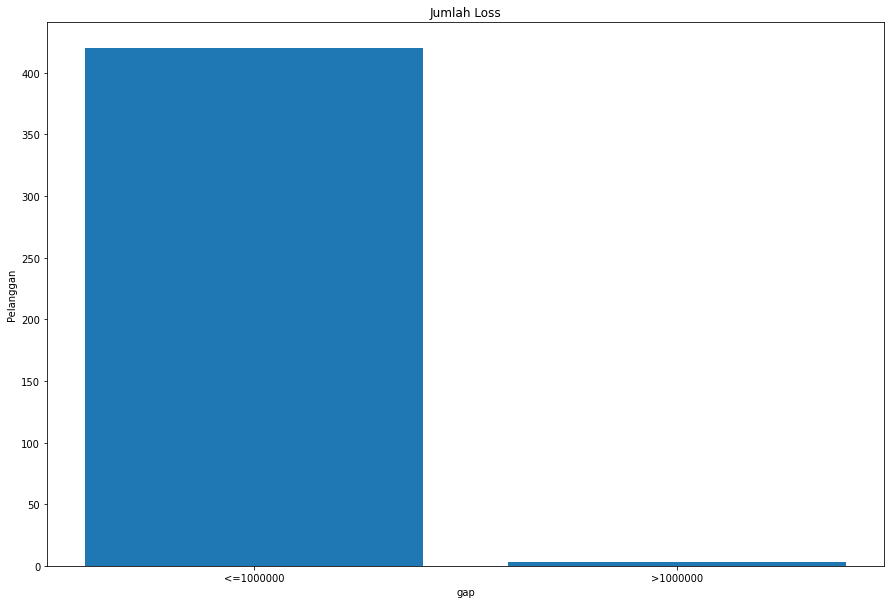

In [ ]:
print(dfkmeansgap['Groupdist'].value_counts().sort_index())
plt_2 = plt.figure(figsize=(15, 10))
plt.bar(dfkmeansgap['Groupdist2'].value_counts().index,dfkmeansgap['Groupdist'].value_counts().sort_index(), width=0.8)
plt.title('Jumlah Loss')
plt.xlabel('gap')
plt.ylabel('Pelanggan')
plt.show()

In [ ]:
dfkmeansgap['Groupdist2'].value_counts()/dfkmeansgap['Groupdist2'].count()*100

<=1000000    99.29078
>1000000      0.70922
Name: Groupdist2, dtype: float64

# New Section

In [ ]:
append_monthly['Freq'] = dfkmeansp['Count']
append_monthly['Loss'] = dfkmeansgap['gap']
append_monthly['Final'] = ""
append_monthly
for i in range(len(append_monthly)):
  if(append_monthly['Freq'][i]>1):
    append_monthly['Final'][i] += "Transaksi Sering | "
  else:
    append_monthly['Final'][i] += "Transaksi Jarang | "
  if(append_monthly['Loss'][i]<1000000):
    append_monthly['Final'][i] += "Loss Kecil | "
  else:
    append_monthly['Final'][i] += "Loss Besar | "
  if(append_monthly['Groupdist'][i]==0):
    append_monthly['Final'][i] += "Nominal Kecil"
  elif(append_monthly['Groupdist'][i]==2):
    append_monthly['Final'][i] += "Nominal Sedang"
  else:
    append_monthly['Final'][i] += "Nominal Besar"
append_monthly

,SO AMOUNT,DO AMOUNT,Groupdist,Groupdist2,Freq,Final,Loss
pelanggan,,,,,,,
4nt0 Crb,4.728000e+04,4.728000e+04,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
A Heru,5.885545e+04,5.885545e+04,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
A Juha,9.318180e+03,0.000000e+00,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,9.318180e+03
A Maman,1.875636e+04,1.875636e+04,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
Abdul Azis,4.604909e+04,0.000000e+00,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,4.604909e+04
Adelisa Adelisa,4.370936e+05,4.370936e+05,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
Adinda Lady,9.456000e+04,9.456000e+04,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
Afifa Fitia,2.175164e+05,2.175164e+05,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00
Afifah Suci,3.339364e+04,3.339364e+04,0,<710000,1,Transaksi Jarang | Loss Kecil | Nominal Kecil,0.000000e+00


In [ ]:
append_monthly['Final'].value_counts()/append_monthly['Final'].count()*100

Transaksi Jarang | Loss Kecil | Nominal Kecil     85.141509
Transaksi Sering | Loss Kecil | Nominal Kecil      7.075472
Transaksi Jarang | Loss Kecil | Nominal Sedang     3.537736
Transaksi Sering | Loss Kecil | Nominal Sedang     3.301887
Transaksi Jarang | Loss Besar | Nominal Sedang     0.471698
Transaksi Sering | Loss Besar | Nominal Sedang     0.235849
Transaksi Jarang | Loss Kecil | Nominal Besar      0.235849
Name: Final, dtype: float64